# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

# Your work here.

Let's have a look at the data:

In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### Is the distribution of the body temperatures normal?

In [5]:
# we need to display the graphics inline
%matplotlib inline
import matplotlib.pyplot as pyplot

According to the Freedman-Diaconis the bin-width is set to $h=\frac{2∗IQR}{n^{(1/3)}}$ and the number of bins is $(max-min)/h$.

In [6]:
IQR = df.temperature.quantile(0.75) - df.temperature.quantile(q=0.25)
h = 2 * IQR / (len(df.temperature.notnull())**(1./3.))
binN = int( (df.temperature.max() - df.temperature.min() )/h )

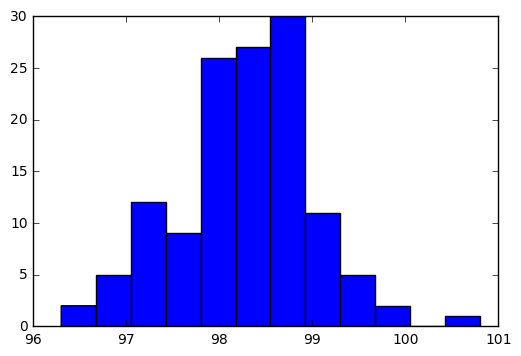

In [7]:
df.temperature.hist(bins = binN, grid = False );

There is also the following Scott's formula to define the bin width $h=\frac{3.5\hat{\sigma}}{n^{1/3}}$ and the number of bins:

In [8]:
sigma = df.temperature.std()
h = 3.5 * sigma / (len(df)**(1./3.))
binNS = int( (df.temperature.max() - df.temperature.min() )/h )
binNS

8

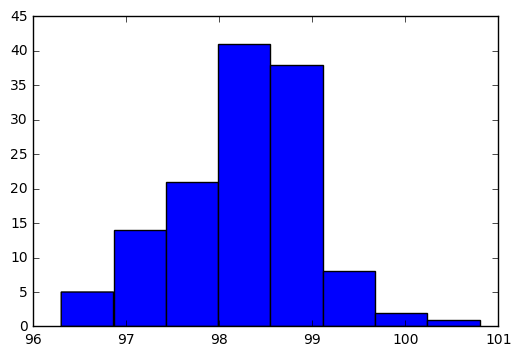

In [9]:
df.temperature.hist(bins = binNS, grid = False );

In [10]:
from scipy import stats
import matplotlib.pyplot as plt

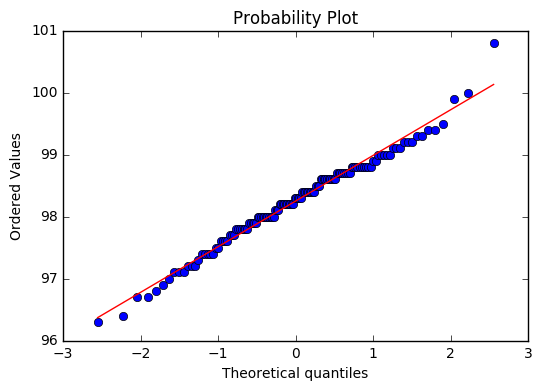

In [11]:
stats.probplot(df.temperature, plot=plt);

Based on the histogram and quantiles plot, the distribution of the temperatures seems to follow a normally distributed model.

### Is the sample size large? Are the observations independent? 

The size of the dataframe is calculated:

In [12]:
RecNum = len(df)
RecNum

130

The sample mean is:

In [13]:
SampleMean = df.temperature.mean()
SampleMean

98.24923076923078

The sample standard deviation is:

In [14]:
df.temperature.std()

0.7331831580389454

The standard error for the sample mean is:

In [15]:
MeanSampleStd = df.temperature.std() / pd.np.sqrt(len(df))
MeanSampleStd

0.06430441683789101

For a normal distribution there should be at least 30 observation to calculate accurate enough estimates. This is requirement is satisfied. The measurements were taken in different days and from different individuals in order to fulfill the independence condition on observations.

### Is the true population mean really 98.6 degrees F? 

Let's start by calculating the z-score for a 95% confidence interval (CI):

In [16]:
zscore2sided95 = stats.norm.ppf(0.975)
zscore2sided95

1.959963984540054

In this excercise the data was retrieved from the modern population. The purpose is to verify if the traditional temperature value is relevant. We have enough data (>30 records) to calculate a z-score. We will use first the one sample test and check whether the traditional 98.6 degrees F is inside CI with 95% confidence:

In [17]:
SampleMean - zscore2sided95 * MeanSampleStd, SampleMean + zscore2sided95 * MeanSampleStd

(98.123196428181657, 98.375265110279898)

98.6 estimate falls out of the 95% CI. This is statistically significant.

Let's calculate the t-statistic:

In [18]:
t_statistic = (SampleMean - 98.6)/MeanSampleStd
t_statistic

-5.4548232923640789

For the t-statistic we calculate the p-value for the above statistic with 129 degrees of freedom:

In [19]:
stats.t.sf(-t_statistic, len(df)-1) #ppf(0.99, len(df) - 1)

1.2053160207804971e-07

This value represent almost a 0 probability to occur. Thus, we can reject the hypothesis that the sample mean and the traditional estimate are the same.

### At what temperature should we consider someone's temperature to be "abnormal"? 

We calculated the margin of error above to be:

In [20]:
round(zscore2sided95 * MeanSampleStd, 2)

0.13

The 95% confidence interval is:

In [21]:
print(round(SampleMean - zscore2sided95 * MeanSampleStd, 2),' - ' , round(SampleMean + zscore2sided95 * MeanSampleStd, 2) )

98.12  -  98.38


### Is there a significant difference between males and females in normal temperature? 

Let's check the mean for each group:

In [22]:
df.groupby('gender').temperature.mean()

gender
F    98.393846
M    98.104615
Name: temperature, dtype: float64

To find whether a difference in means between 2 different population we should conduct a two-sample test by using the following formula:
$$z=\frac{\bar{x}_F - \bar{x}_M}{\sqrt{\hat{\sigma}_F^2/n_1 + \hat{\sigma}_M^2/n_2}}$$

In [24]:
import numpy as np

In [33]:
meanF = 98.39
meanM = 98.1
varF = df.temperature[df.gender=='F'].var()
varM = df.temperature[df.gender=='M'].var()
z_score = (meanF - meanM)/np.sqrt(varF/len(df[df.gender=='F']) + varM/len(df[df.gender=='M']))
z_score, 1 - stats.norm.cdf(z_score)

(2.2915128215118425, 0.010966885589092312)

The 2-sample test resulted in a p-value = 1%. It means that we could get this result once in 100 experiments. We can reject the null hypothesis that temperatures between males and females are the same. 

We can conduct some more simulations to check whether there will be a difference between 2 groups. This will actually be a one-sample test. Let's shuffle and run a simulation of size 1000. 

In [26]:
def CalcStatistic(data):
    group1, group2 = data
    statVal = group1.mean() - group2.mean()
    return statVal

In [27]:
def RunModel(data):
    group1, group2 = data
    n, m = len(group1), len(group2)
    pool = np.hstack((group1, group2))
    np.random.shuffle(pool)
    ShuffledData = pool[:n], pool[n:]
    return ShuffledData

Now, we run 1000 simulations:

In [28]:
test_stats = np.array([CalcStatistic(RunModel( (df.temperature[df.gender == 'F'], df.temperature[df.gender == 'M']) )) for i in range(1000)])

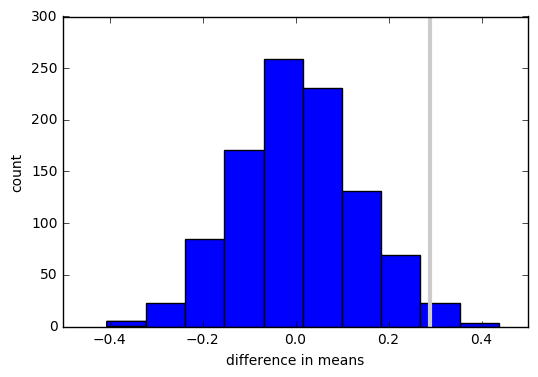

In [29]:
pyplot.vlines(CalcStatistic( (df.temperature[df.gender == 'F'], df.temperature[df.gender == 'M']) ), 0, 300, linewidth=3, color='0.8')
pyplot.hist(test_stats)
pyplot.xlabel('difference in means')
pyplot.ylabel('count');

In [30]:
test_stats.mean(), test_stats.std()

(0.0041323076923087147, 0.13102914806486232)

In [31]:
probabilityGE = test_stats[test_stats > CalcStatistic( (df.temperature[df.gender == 'F'], df.temperature[df.gender == 'M']) )].sum() / 1000
round(probabilityGE, 3) * 100

0.59999999999999998

The probability of the difference between males and females under null hypothesis is 0.6%. Because p-value is less than 1% we can reject the null hypothesis that there is no difference between temperatures grouped by gender. (Note: the p-value will be subject to change under different runs)

## Conclusions

Traditionally the normal human body temperature is estimated and accepted to indicate a healthy condition in a person when it measures to 98.6 degrees F. Recently, we got a set of observations that indicate a new estimate for a healthy temperature in a person. To understand this difference we took the following steps:
 - confirmed that the data is normally distributed and that the observations are independent
 - performed 2 different tests for the hypothesis that the difference between the traditional estimate and that retrieved from the data is 0. The first test was based on z-score and the null hypothesis was rejected as there is less than 5% (and even 1%) chance that the traditional value falls under the sample mean confidence interval. The same result was received by testing the differenc by utilizing t-statistic. The difference in the estimates could be for different reasons. Among them, thermometer precision in the past.
 - defined the confidence interval for a normal body temperature.
 - tested whether there is a temperature difference defined by gender. The difference is statistically significant and the hypothesis that the temperature is the same for male and females was rejected. There is a 0.3% probability that the temperature for both male and females is the same.